In [1]:
import apts as ap
import pandas as pd

%matplotlib inline  

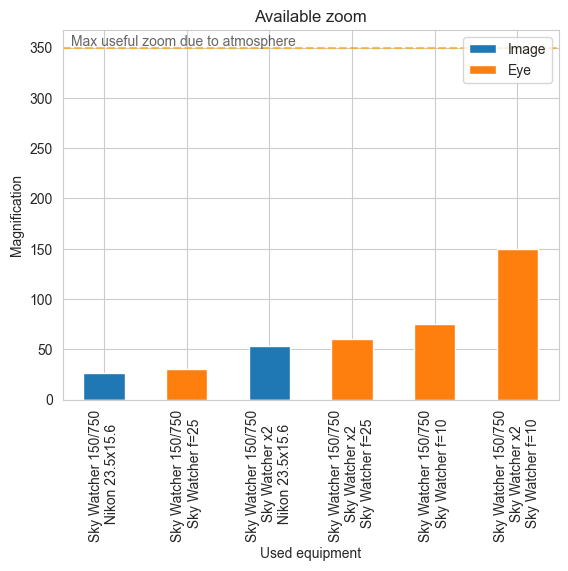

In [2]:
e = ap.Equipment()

sky_watcher = "Sky Watcher"

e.register(ap.equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(ap.equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(ap.equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(ap.equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(ap.equipment.Eyepiece(25, sky_watcher))
e.register(ap.equipment.Eyepiece(10, sky_watcher))
#e.register(ap.equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

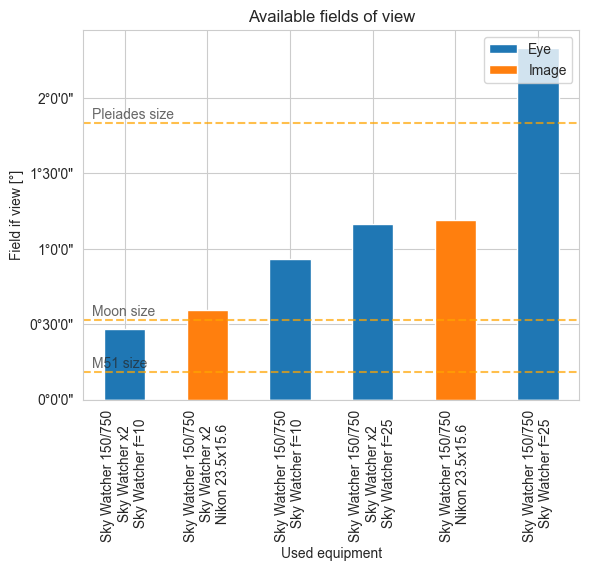

In [3]:
e.plot_fov()

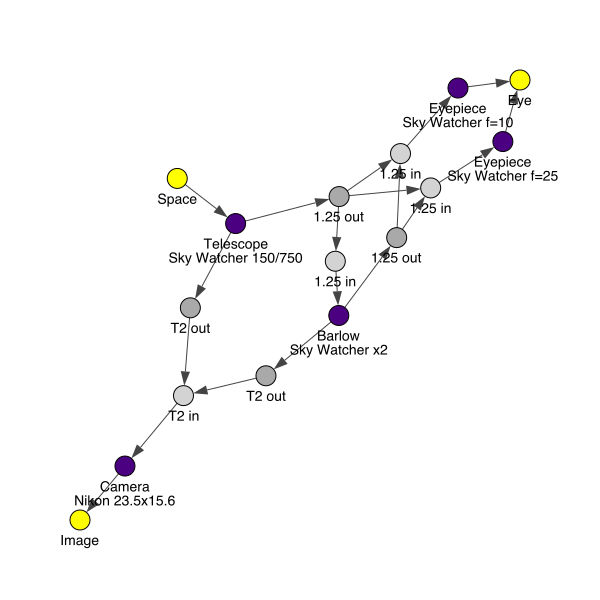

In [4]:
e.plot_connection_graph()

In [5]:
data = e.data()
data[data.Useful== True].sort_values(['Zoom'], ascending=[0])

,ID,Label,Type,Zoom,Useful,FoV,Exit pupil,Dawes' limit,Range,Brightness,Elements
1,1,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=10",Eye,150.00000,True,0.466667,1.0 millimeter,0.773 arcsecond,13.580456,2.040816,3
3,3,"Sky Watcher 150/750, Sky Watcher f=10",Eye,75.00000,True,0.933333,2.0 millimeter,0.773 arcsecond,13.580456,8.163265,2
0,0,"Sky Watcher 150/750, Sky Watcher x2, Sky Watcher f=25",Eye,60.00000,True,1.166667,2.5 millimeter,0.773 arcsecond,13.580456,12.755102,3
4,4,"Sky Watcher 150/750, Sky Watcher x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,0.0 millimeter,0.773 arcsecond,13.580456,16.236939,3
2,2,"Sky Watcher 150/750, Sky Watcher f=25",Eye,30.00000,True,2.333333,5.0 millimeter,0.773 arcsecond,13.580456,51.020408,2
5,5,"Sky Watcher 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,0.0 millimeter,0.773 arcsecond,13.580456,64.947755,2


In [6]:
place = ap.Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = ap.Observation(place,e)

In [7]:
place.sunset_time()

datetime.datetime(2025, 4, 9, 19, 26, 2, 669835, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

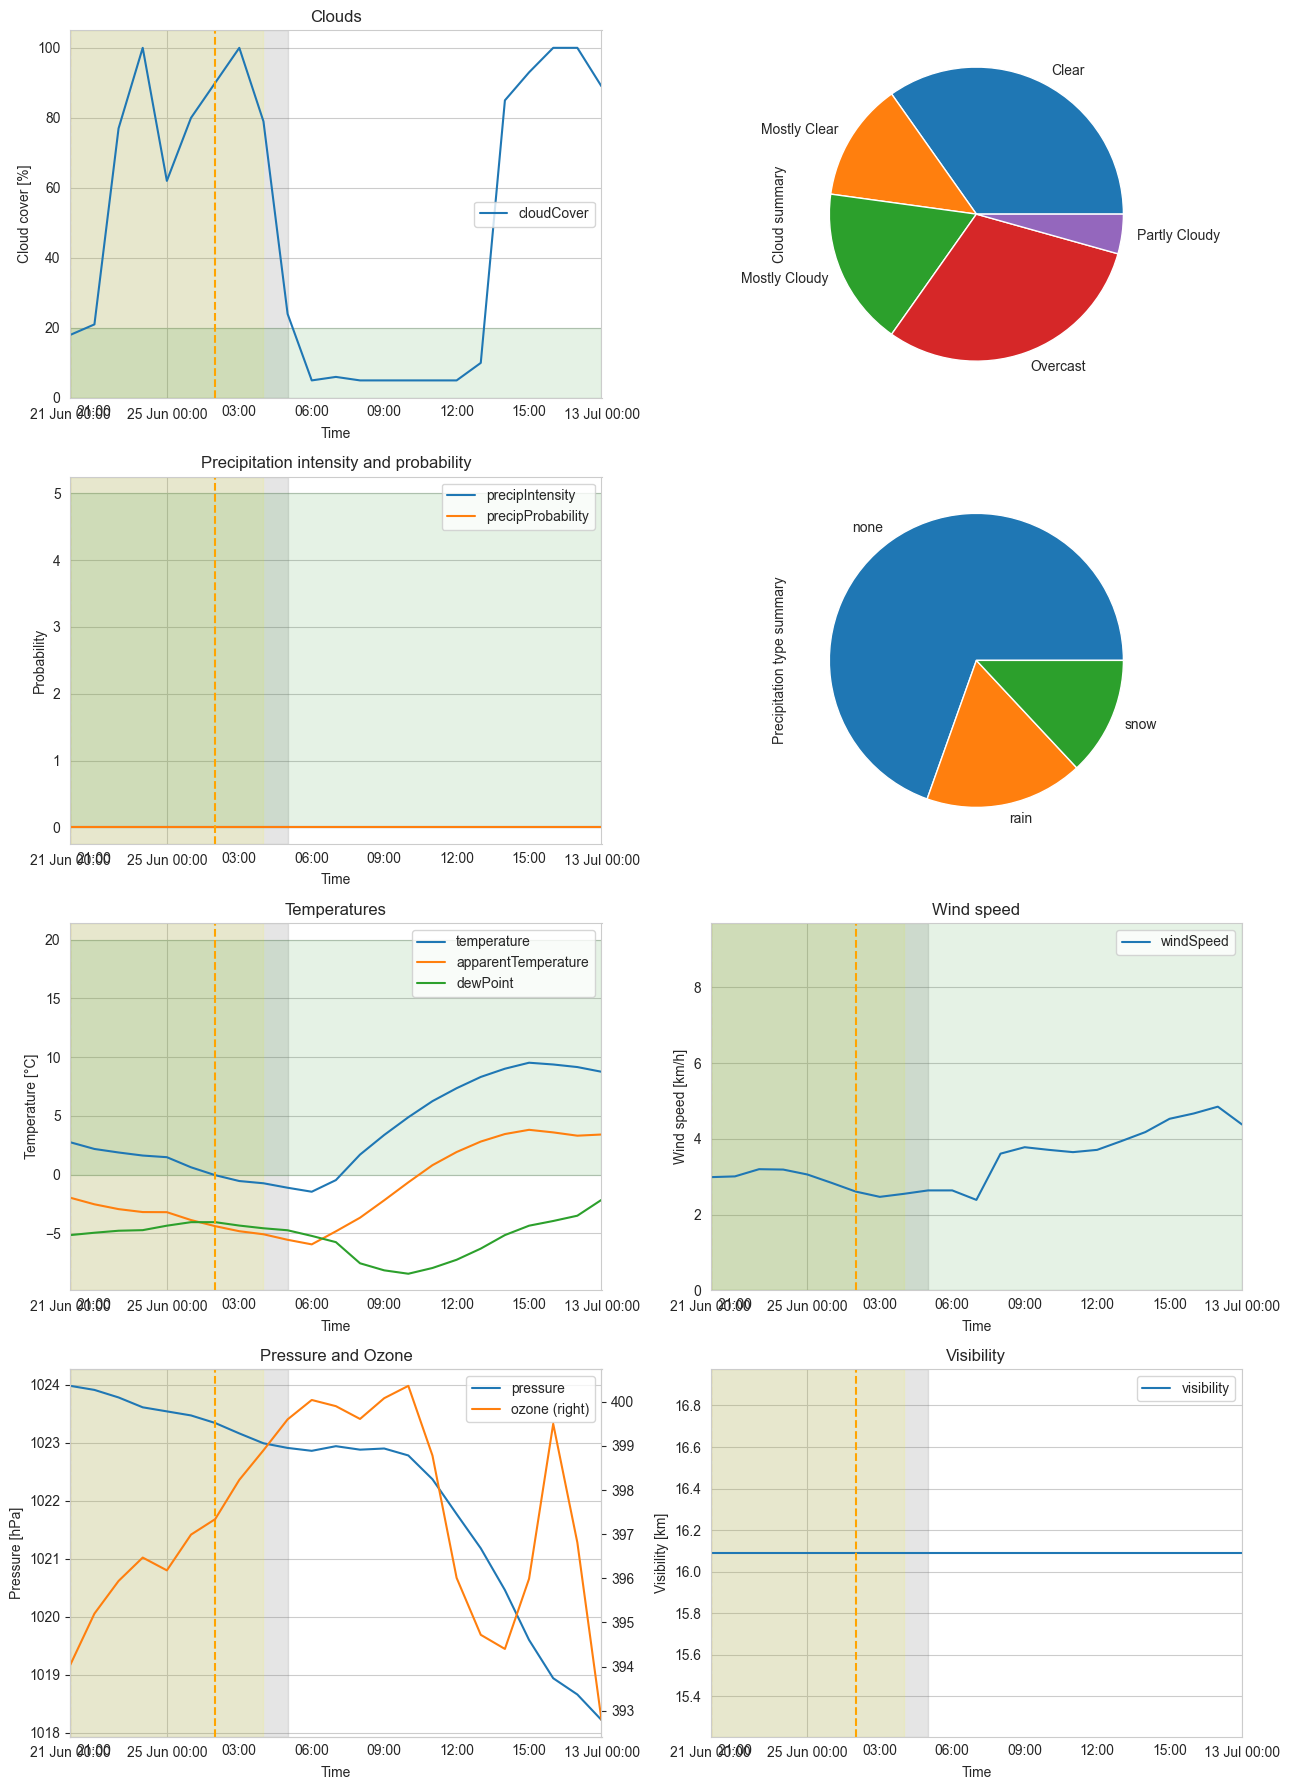

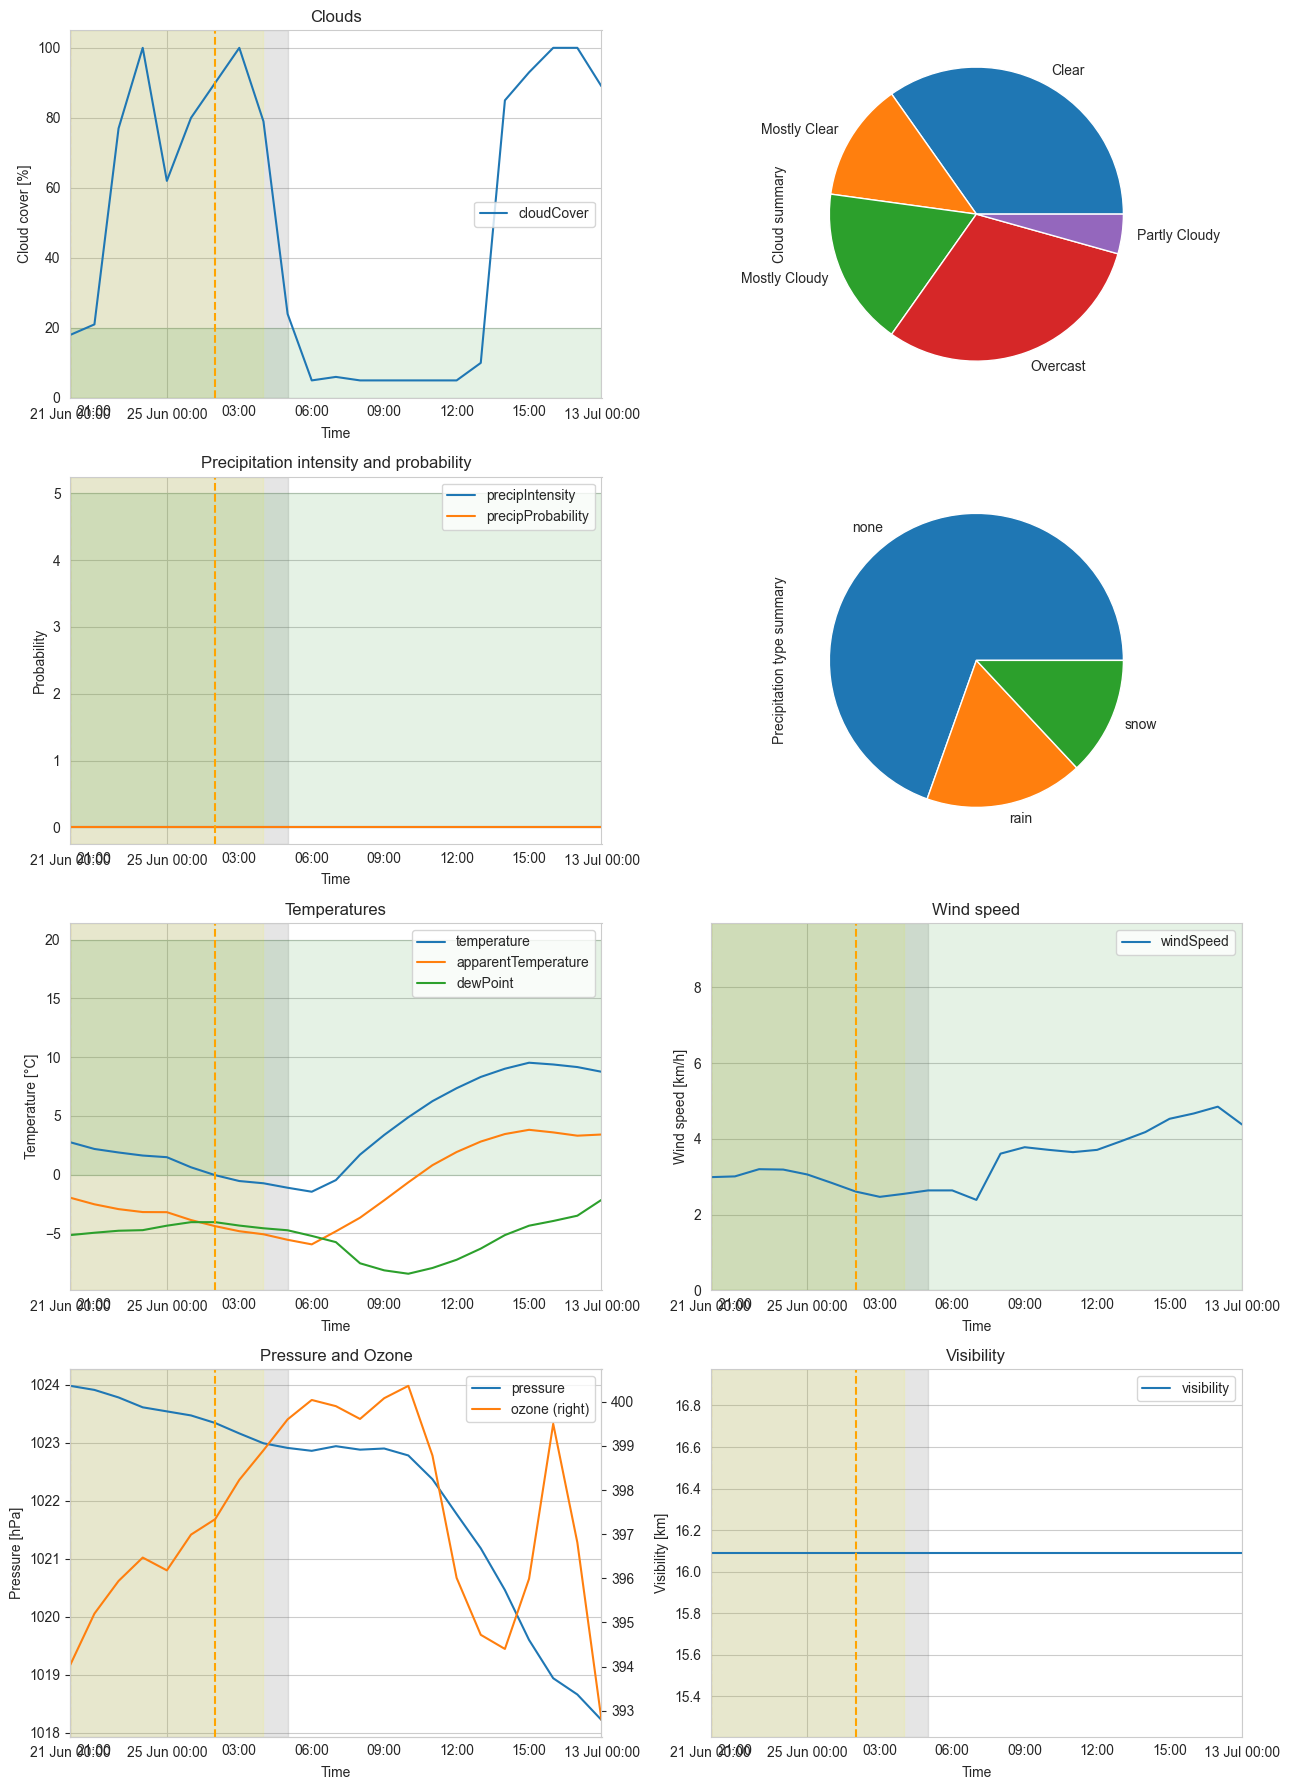

In [8]:
o.plot_weather()

In [9]:
o.is_weather_good()

False

In [10]:
o.place.moon_phase()

82

<Axes: title={'center': 'Moon altitude'}, xlabel='Azimuth [°]', ylabel='Altitude [°]'>

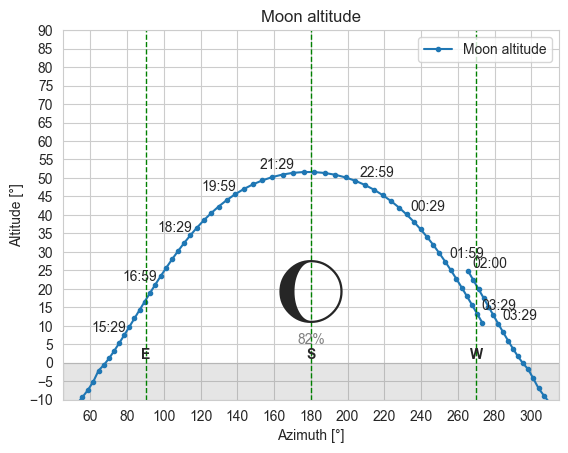

In [11]:
o.place.plot_moon_path()

In [12]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [13]:
o.local_planets.objects

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase
0,"<Mercury ""Mercury"" at 0x118a92760>",Mercury,2025-04-09 11:19:08.542439+02:00,2025-04-09 05:24:16.238990+02:00,2025-04-09 17:13:41.893447+02:00,-30.426222,1.36 mag,23.820609223545045 hour,-1.5855391982160387 degree,0.6740387678146362 AU,9.999424934387207 arcsecond,-22.27418327331543 degree,22.300609588623047 dimensionless
1,"<Venus ""Venus"" at 0x118a928f0>",Venus,2025-04-09 11:01:58.464829+02:00,2025-04-09 04:44:47.768014+02:00,2025-04-09 17:18:29.808113+02:00,-28.110128,-4.32 mag,23.545024595372023 hour,3.1573158028533372 degree,0.32147881388664246 AU,52.63177490234375 arcsecond,-24.786376953125 degree,9.31840991973877 dimensionless
2,"<Mars ""Mars"" at 0x118a92a80>",Mars,2025-04-09 19:24:51.310189+02:00,2025-04-09 11:17:09.102287+02:00,2025-04-09 03:35:07.698913+02:00,59.806769,0.59 mag,7.922328767265104 hour,23.31601337527588 degree,1.212537169456482 AU,7.719351291656494 arcsecond,97.12850189208984 degree,90.12958526611328 dimensionless
3,"<ephem.Jupiter ""Jupiter"" at 0x11888c930>",Jupiter,2025-04-09 16:33:45.398420+02:00,2025-04-09 08:31:00.559923+02:00,2025-04-09 00:39:39.973846+02:00,35.934021,-1.93 mag,5.077590787704539 hour,22.539826923168704 degree,5.5742268562316895 AU,35.29458236694336 arcsecond,58.06306076049804 degree,99.30522155761719 dimensionless
4,"<ephem.Saturn ""Saturn"" at 0x11888cab0>",Saturn,2025-04-09 11:15:52.535083+02:00,2025-04-09 05:30:28.818038+02:00,2025-04-09 17:01:22.397466+02:00,-32.560526,1.21 mag,23.770818998850437 hour,-3.6130440447081584 degree,10.508200645446777 AU,15.75912094116211 arcsecond,-23.839111328125 degree,99.95555877685547 dimensionless
5,"<Uranus ""Uranus"" at 0x118a92c10>",Uranus,2025-04-09 15:00:15.159945+02:00,2025-04-09 07:20:49.612169+02:00,2025-04-08 22:43:22.850605+02:00,18.352047,5.81 mag,3.5224592612673846 hour,18.832508649006105 degree,20.338417053222656 AU,3.4654123783111572 arcsecond,35.9530143737793 degree,99.97734832763672 dimensionless
6,"<Neptune ""Neptune"" at 0x118a92da0>",Neptune,2025-04-09 11:32:40.564748+02:00,2025-04-09 05:35:01.337007+02:00,2025-04-09 17:30:21.798232+02:00,-28.199017,7.95 mag,0.05459511895827384 hour,-1.025695913615046 degree,30.8375186920166 AU,2.214639902114868 arcsecond,-18.871902465820312 degree,99.99706268310547 dimensionless


In [14]:
o.get_visible_planets()

,Ephem,Name,Transit,Rising,Setting,Altitude,Magnitude,RA,Dec,Distance,Size,Elongation,Phase,ID
5,"<Uranus ""Uranus"" at 0x118a92c10>",Uranus,2025-04-09 15:00:15.159945+02:00,2025-04-09 07:20:49.612169+02:00,2025-04-08 22:43:22.850605+02:00,18.352047,5.81 mag,3.5224592612673846 hour,18.832508649006105 degree,20.338417053222656 AU,3.4654123783111572 arcsecond,35.9530143737793 degree,99.97734832763672 dimensionless,5
3,"<ephem.Jupiter ""Jupiter"" at 0x11888c930>",Jupiter,2025-04-09 16:33:45.398420+02:00,2025-04-09 08:31:00.559923+02:00,2025-04-09 00:39:39.973846+02:00,35.934021,-1.93 mag,5.077590787704539 hour,22.539826923168704 degree,5.5742268562316895 AU,35.29458236694336 arcsecond,58.06306076049804 degree,99.30522155761719 dimensionless,3


In [15]:
o.plot_visible_planets()

In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude,ID
80,M81,Bode's Galaxy,NGC 3031,Spiral Galaxy,Ursa Major,6.9 mag,12000000 light_year,9.926666666666666 hour,69.06666666666666 degree,21.0 arcminute,10.0 arcminute,2025-04-08 21:29:20.179038+02:00,70.218504,80
81,M82,Cigar Galaxy,NGC 3034,Irregular Galaxy,Ursa Major,8.4 mag,12000000 light_year,9.93 hour,69.68333333333334 degree,9.0 arcminute,4.0 arcminute,2025-04-08 21:29:33.680973+02:00,69.649707,81
94,M95,-,NGC 3351,Spiral Galaxy,Leo,9.7 mag,38000000 light_year,10.733333333333333 hour,11.7 degree,4.4 arcminute,3.3 arcminute,2025-04-08 22:16:50.909649+02:00,46.385259,94
95,M96,-,NGC 3368,Spiral Galaxy,Leo,9.2 mag,38000000 light_year,10.78 hour,11.816666666666665 degree,6.0 arcminute,4.0 arcminute,2025-04-08 22:19:38.404491+02:00,46.222332,95
104,M105,-,NGC 3379,Elliptical Galaxy,Leo,9.3 mag,38000000 light_year,10.796666666666669 hour,12.583333333333336 degree,2.0 arcminute,2.0 arcminute,2025-04-08 22:20:38.371377+02:00,46.825311,104
107,M108,-,NGC 3556,Spiral Galaxy,Ursa Major,10.0 mag,45000000 light_year,11.191666666666665 hour,55.66666666666666 degree,8.0 arcminute,1.0 arcminute,2025-04-08 22:44:26.028977+02:00,70.324420,107
96,M97,Owl Nebula,NGC 3587,Planetary Nebula,Ursa Major,9.9 mag,2600 light_year,11.246666666666664 hour,55.01666666666666 degree,3.4 arcminute,3.3 arcminute,2025-04-08 22:47:42.534145+02:00,69.870561,96
64,M65,-,NGC 3623,Spiral Galaxy,Leo,9.3 mag,35000000 light_year,11.315 hour,13.083333333333336 degree,8.0 arcminute,1.5 arcminute,2025-04-08 22:51:38.453536+02:00,43.858045,64
65,M66,-,NGC 3627,Spiral Galaxy,Leo,8.9 mag,35000000 light_year,11.336666666666664 hour,12.983333333333333 degree,8.0 arcminute,2.5 arcminute,2025-04-08 22:52:56.188586+02:00,43.615433,65
108,M109,-,NGC 3992,Spiral Galaxy,Ursa Major,9.8 mag,55000000 light_year,11.96 hour,53.38333333333333 degree,7.0 arcminute,4.0 arcminute,2025-04-08 23:30:14.659515+02:00,63.491185,108


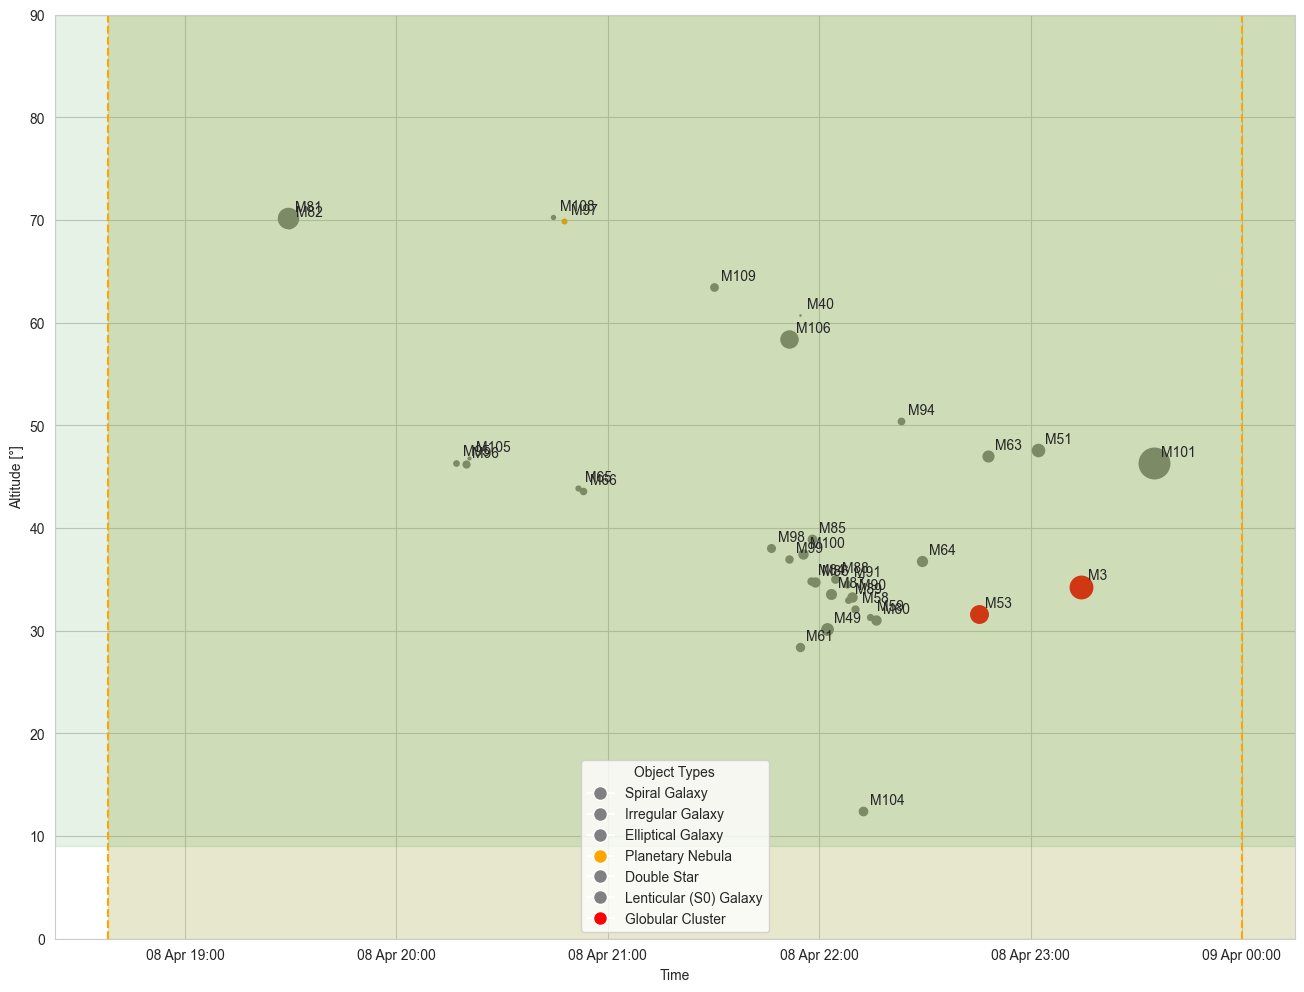

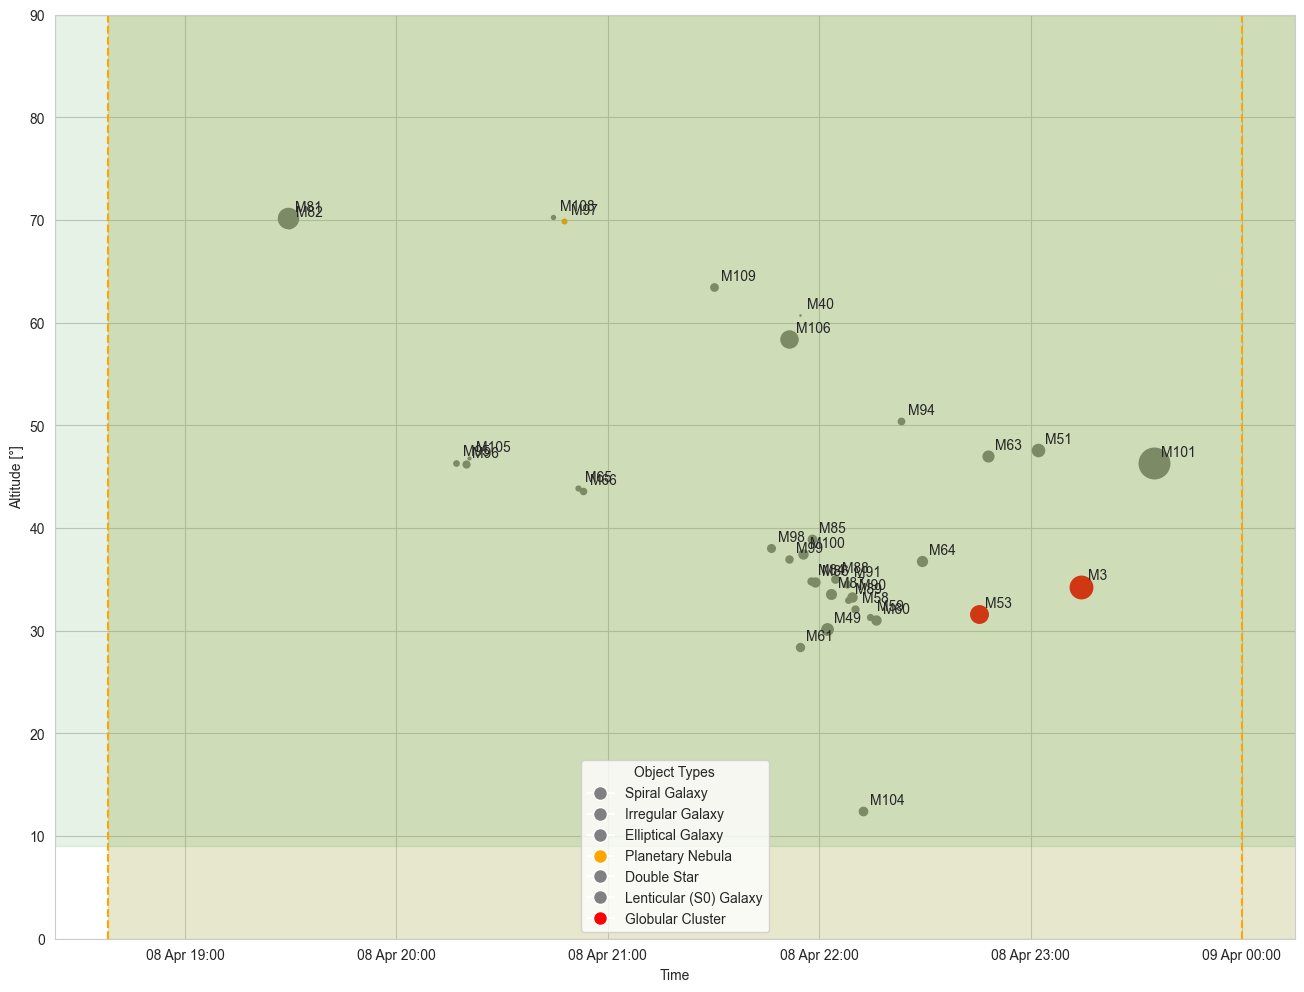

In [17]:
o.plot_messier()

In [18]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)

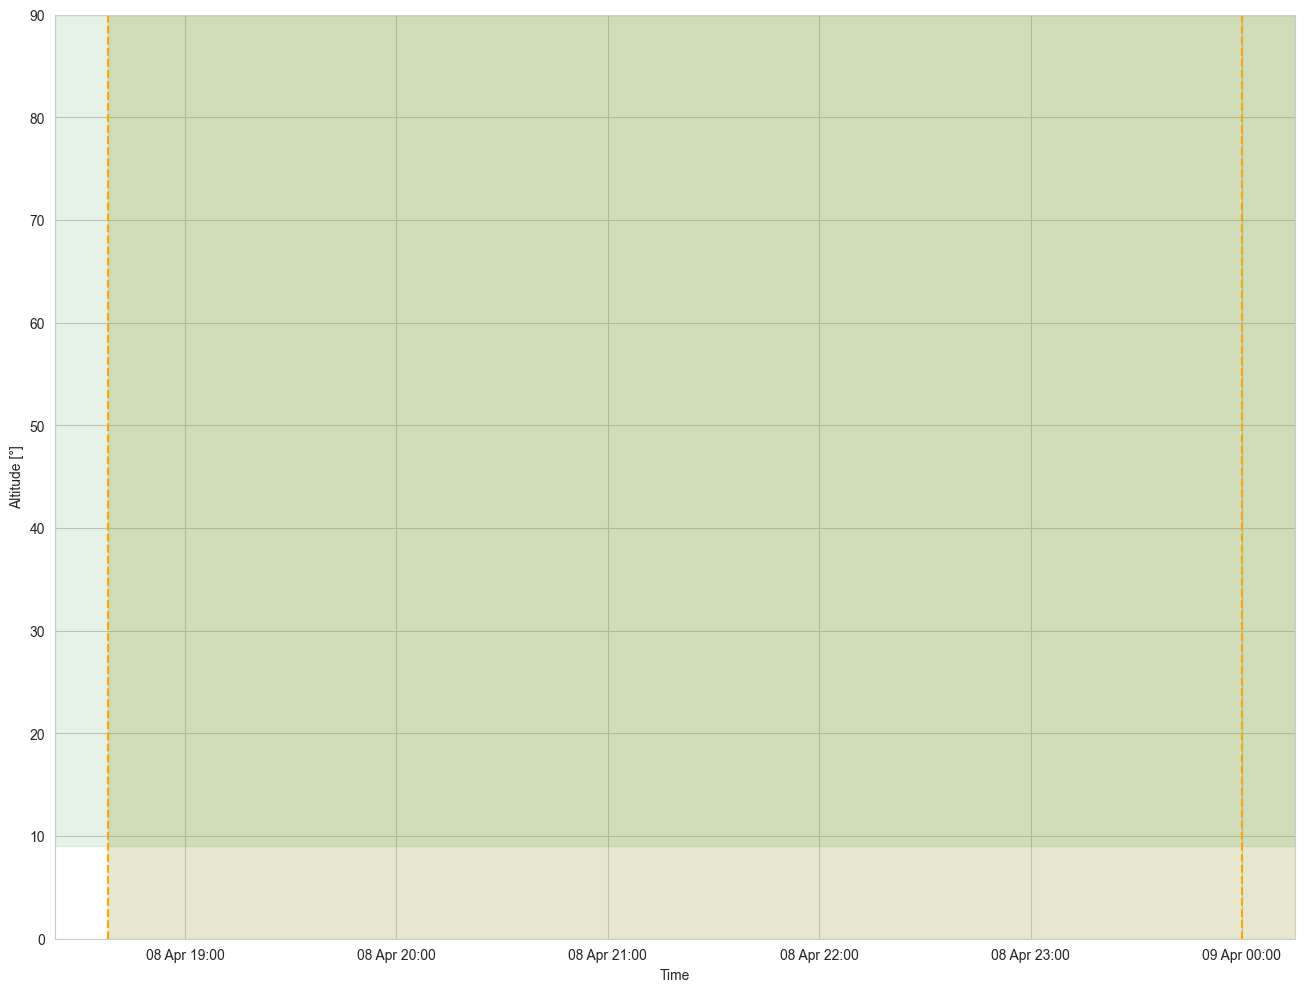

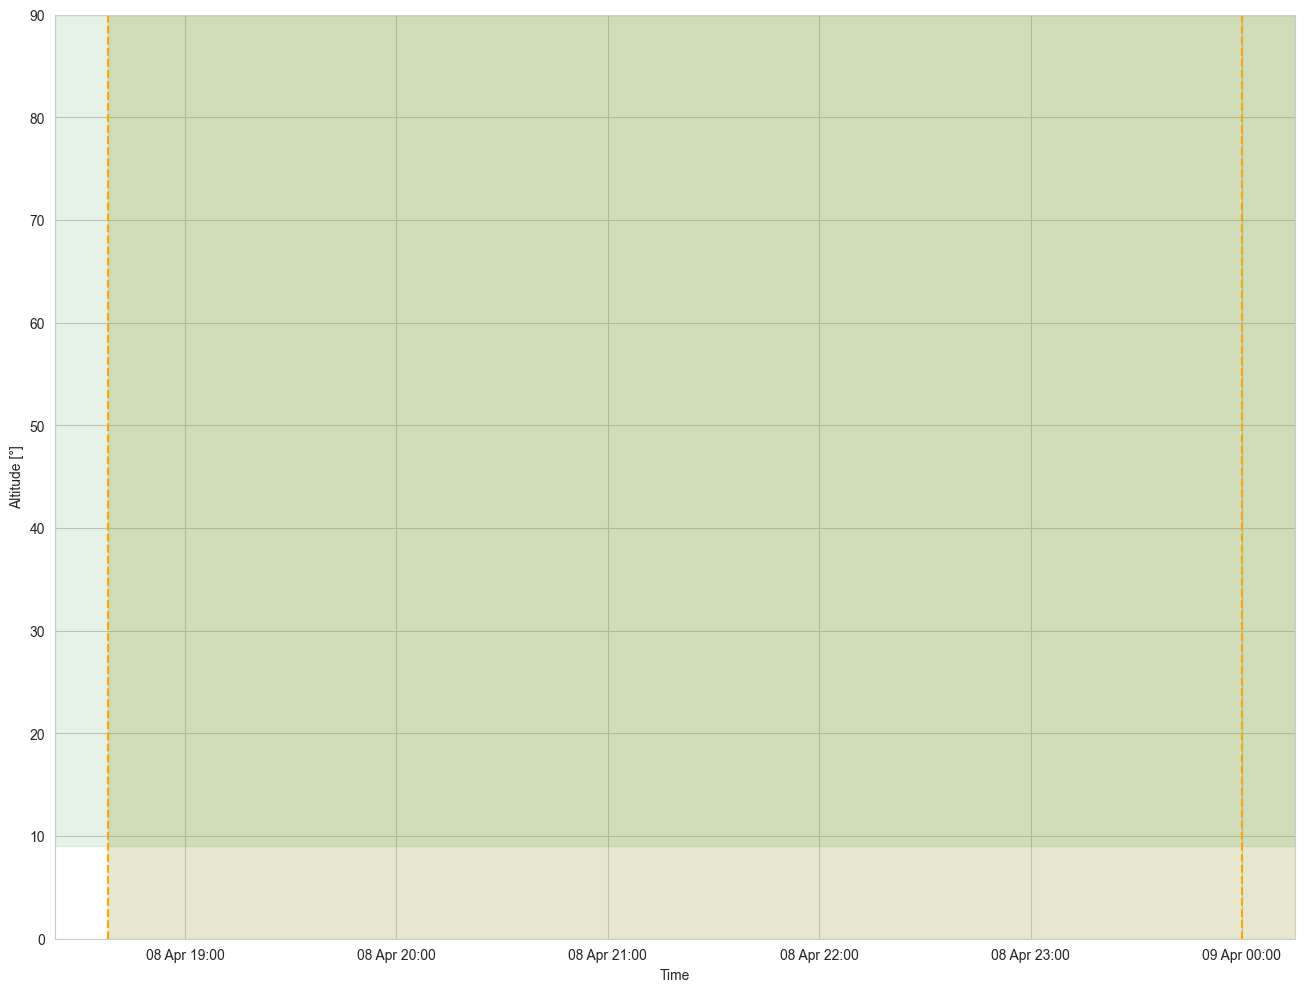

In [19]:
o.plot_planets()